In [49]:
# Loading the Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import random
import plotly.express as px

In [56]:
data = pd.read_csv('/content/drive/MyDrive/Segmentation/Segmentation_Data.csv')
print("Shape of the dataset:")
print(data.shape)


Shape of the dataset:
(325, 16)


In [61]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Unnamed: 0      Zone  State   City                  Name          Type  \
0           0  Northern  Delhi  Delhi            India Gate  War Memorial   
1           1  Northern  Delhi  Delhi        Humayun's Tomb          Tomb   
2           2  Northern  Delhi  Delhi     Akshardham Temple        Temple   
3           3  Northern  Delhi  Delhi  Waste to Wonder Park    Theme Park   
4           4  Northern  Delhi  Delhi         Jantar Mantar   Observatory   

  Establishment Year  time needed to visit in hrs  Google review rating  \
0               1921                          0.5                   4.6   
1               1572                          2.0                   4.5   
2               2005                          5.0                   4.6   
3               2019                          2.0                   4.1   
4               1724                          2.0                   4.2   

   Entrance Fee in INR Airport with 50km Radius Weekly Of

In [62]:
print('Dataset info:')
data.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        325 non-null    int64  
 1   Zone                              325 non-null    object 
 2   State                             325 non-null    object 
 3   City                              325 non-null    object 
 4   Name                              325 non-null    object 
 5   Type                              325 non-null    object 
 6   Establishment Year                325 non-null    object 
 7   time needed to visit in hrs       325 non-null    float64
 8   Google review rating              325 non-null    float64
 9   Entrance Fee in INR               325 non-null    int64  
 10  Airport with 50km Radius          325 non-null    object 
 11  Weekly Off                        32 non-null     object 

In [63]:
print('Dataset description:')
data.describe()

Dataset description:


,Unnamed: 0,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Number of google review in lakhs
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,162.000000,1.807692,4.486154,115.809231,0.408438
std,93.963645,0.971398,0.274580,530.859785,0.646668
min,0.000000,0.500000,1.400000,0.000000,0.010000
25%,81.000000,1.000000,4.400000,0.000000,0.059000
50%,162.000000,1.500000,4.500000,0.000000,0.170000
75%,243.000000,2.000000,4.600000,40.000000,0.500000
max,324.000000,7.000000,4.900000,7500.000000,7.400000


In [64]:
# Handaling missing values
print("Missing values are:")
data.isnull().sum()

Missing values are:


,0
Unnamed: 0,0
Zone,0
State,0
City,0
Name,0
Type,0
Establishment Year,0
time needed to visit in hrs,0
Google review rating,0
Entrance Fee in INR,0


In [65]:
data['Weekly Off'].value_counts()

,count
Weekly Off,
Monday,23
Friday,5
Sunday,2
Yes,1
Tuesday,1


In [66]:
#Filling nan Values
distribution = {
    'Monday': 23,
    'Friday': 5,
    'Sunday': 2,
    'Tuesday': 1
}

# Calculate probabilities
total = sum(distribution.values())
probabilities = {day: count/total for day, count in distribution.items()}
days = list(distribution.keys())
weights = list(distribution.values())

# Fill missing values with probability-matched days
data['Weekly Off'] = data['Weekly Off'].apply(
    lambda x: x if pd.notna(x) else random.choices(days, weights=weights)[0]
)

In [67]:
print("\nMissing values after treatment:")
display(data.isnull().sum())


Missing values after treatment:


,0
Unnamed: 0,0
Zone,0
State,0
City,0
Name,0
Type,0
Establishment Year,0
time needed to visit in hrs,0
Google review rating,0
Entrance Fee in INR,0


## Data Preprocessing

In [68]:
significance_weights = {
    'Historical': 5,
    'Archaeological': 5,
    'Cultural': 5,
    'Architectural': 4.5,
    'Engineering Marvel': 4.5,
    'Religious': 4,
    'Spiritual': 4,
    'Natural Wonder': 4,
    'Environmental': 3.5,
    'Nature': 3.5,
    'Wildlife': 3.5,
    'Botanical': 3,
    'Entertainment': 3,
    'Recreational': 3,
    'Adventure': 3,
    'Sports': 3,
    'Trekking': 3,
    'Educational': 4,
    'Scientific': 4,
    'Market': 2,
    'Shopping': 2,
    'Food': 2,
    'Artistic': 3.5,
    'Scenic': 3,
    'Agricultural': 2.5
}
data['Significance'] = data['Significance'].map(significance_weights)

# Select relevant features for clustering
cluster_features = data[['Google review rating', 'Number of google review in lakhs',
                      'time needed to visit in hrs', 'Entrance Fee in INR',
                      'Significance']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

## Exploratory Data Analysis

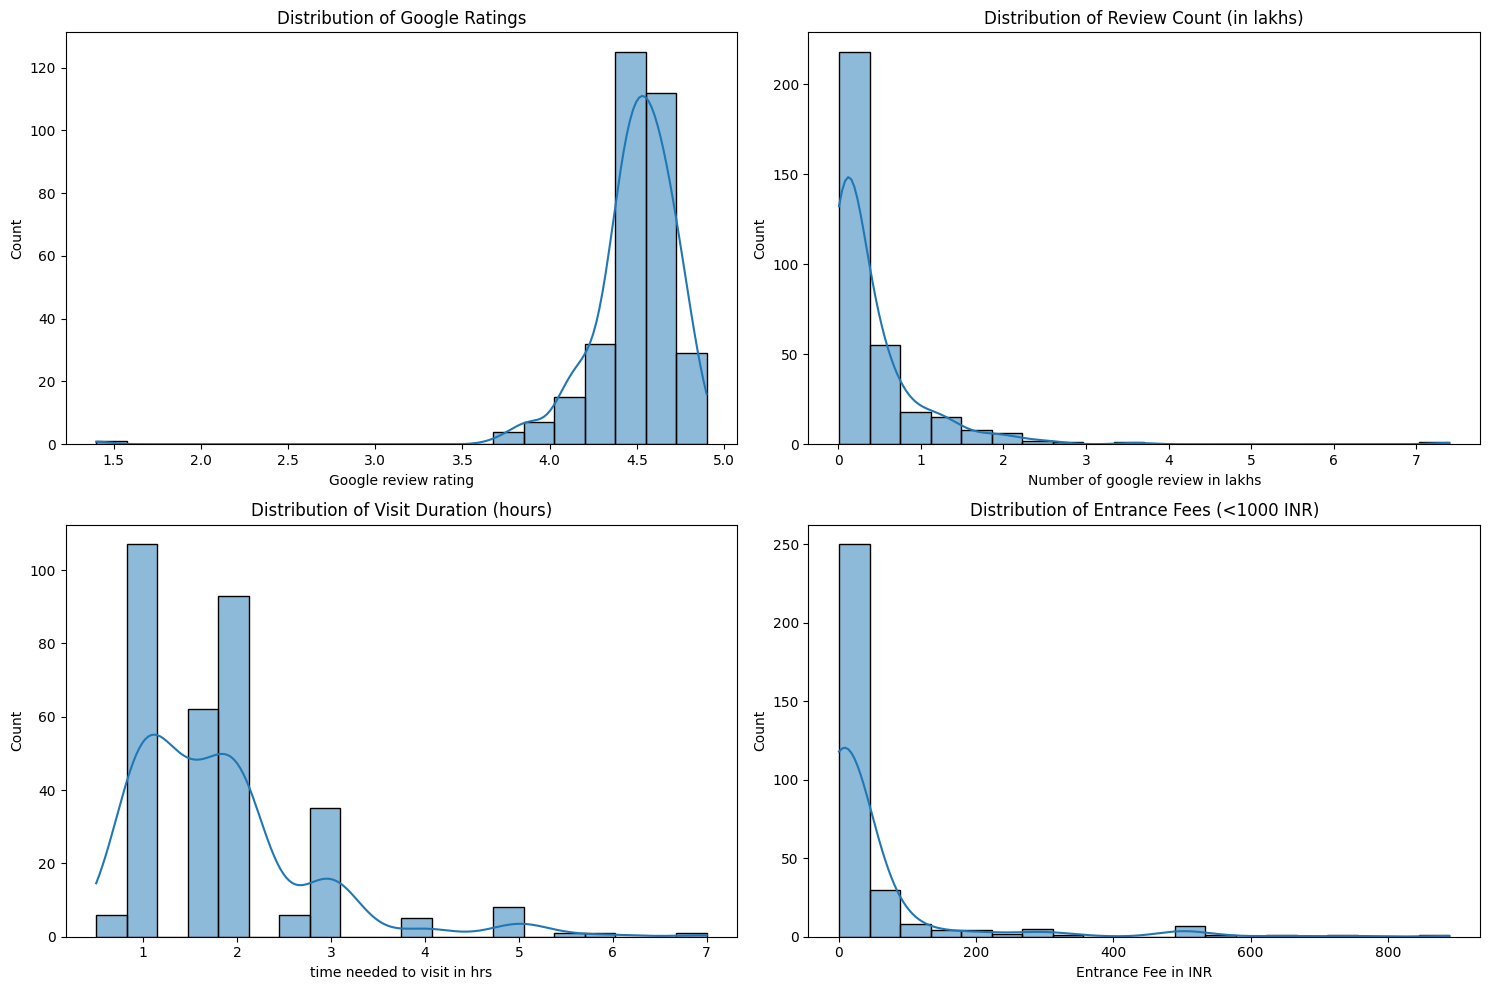

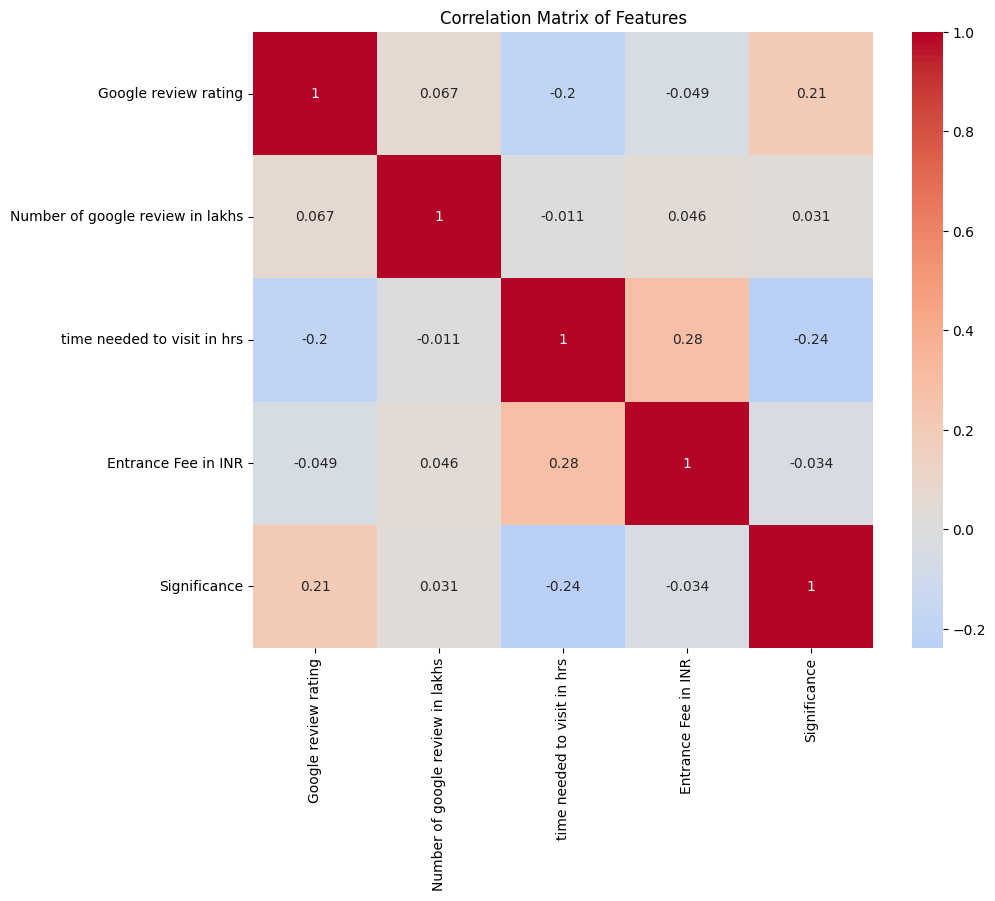

In [69]:
# Plotting distribution of key features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['Google review rating'], bins=20, kde=True)
plt.title('Distribution of Google Ratings')

plt.subplot(2, 2, 2)
sns.histplot(data['Number of google review in lakhs'], bins=20, kde=True)
plt.title('Distribution of Review Count (in lakhs)')

plt.subplot(2, 2, 3)
sns.histplot(data['time needed to visit in hrs'], bins=20, kde=True)
plt.title('Distribution of Visit Duration (hours)')

plt.subplot(2, 2, 4)
sns.histplot(data[data['Entrance Fee in INR'] < 1000]['Entrance Fee in INR'], bins=20, kde=True)
plt.title('Distribution of Entrance Fees (<1000 INR)')

plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = cluster_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

## Determinig the Optimal Number of Clusters

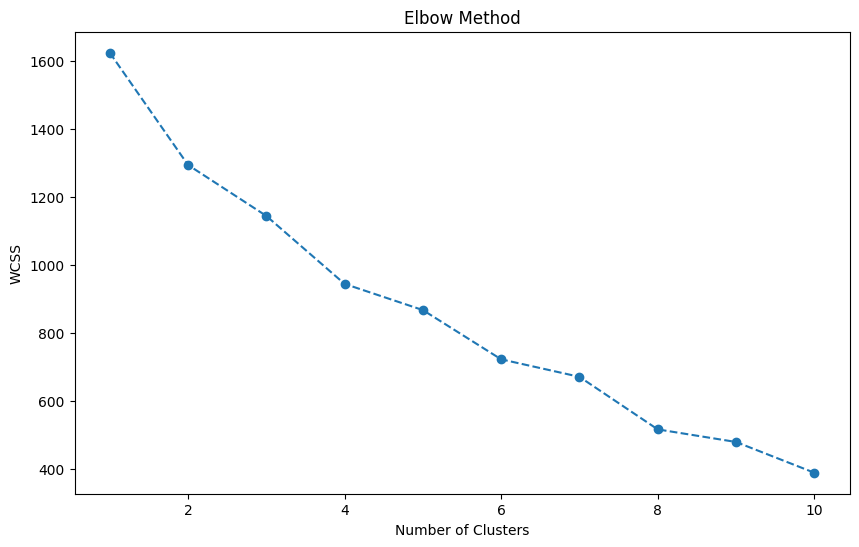

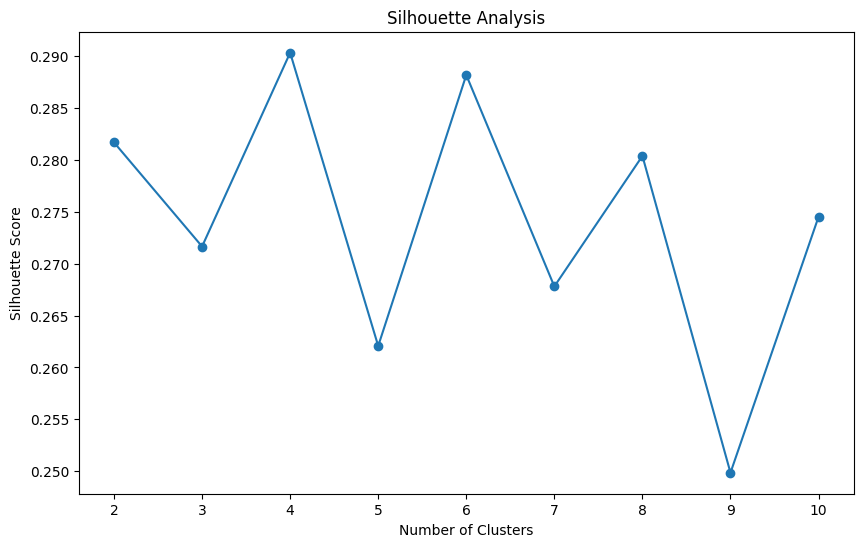

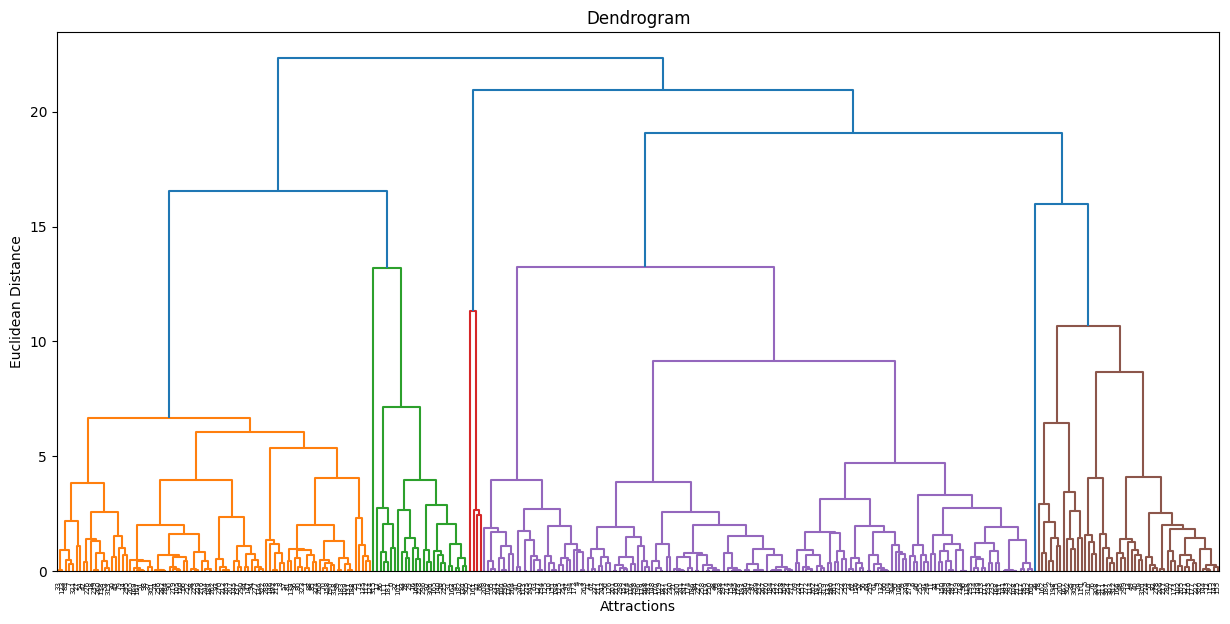

In [70]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Hierarchical Clustering - Dendrogram
plt.figure(figsize=(15, 7))
dend = dendrogram(linkage(scaled_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Attractions')
plt.ylabel('Euclidean Distance')
plt.show()

## K-Mean Clustering

Cluster Profiles:


,Google review rating,Number of google review in lakhs,time needed to visit in hrs,Entrance Fee in INR,Significance,Count
Cluster,,,,,,
0,4.321053,0.290263,4.447368,1316.736842,3.526316,19
1,4.580000,1.768000,1.614286,66.428571,4.142857,35
2,4.378571,0.219849,1.956349,48.333333,3.250000,126
3,4.578621,0.259631,1.379310,29.000000,4.534483,145


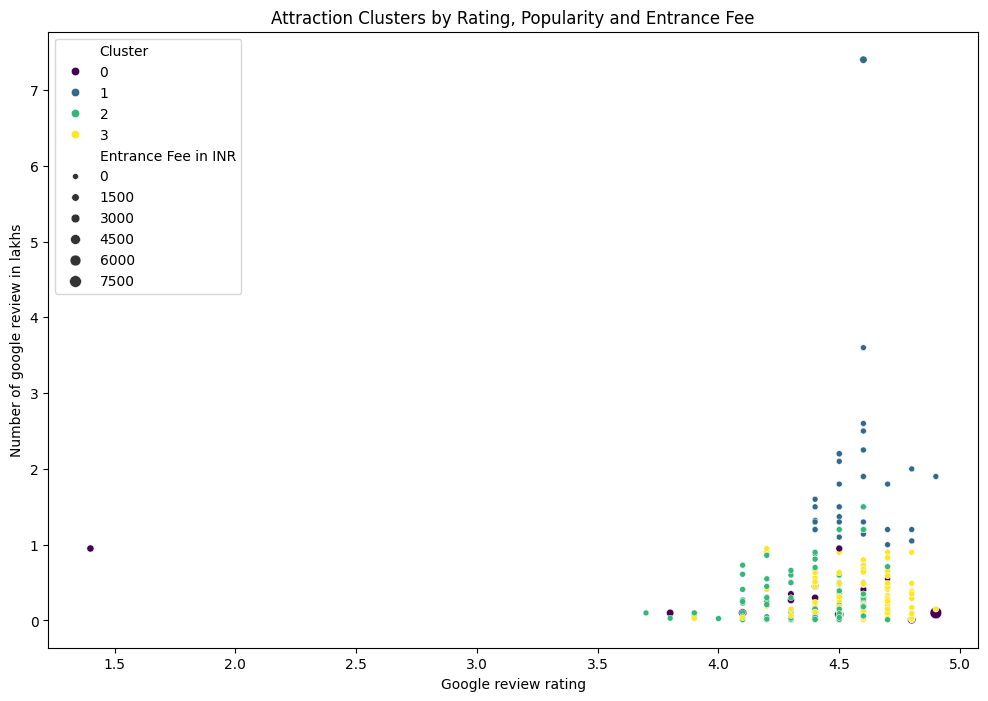

In [71]:
# Perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to original dataframe
data['Cluster'] = clusters

# Analyze cluster characteristics
cluster_profile = data.groupby('Cluster').agg({
    'Google review rating': 'mean',
    'Number of google review in lakhs': 'mean',
    'time needed to visit in hrs': 'mean',
    'Entrance Fee in INR': 'mean',
    'Significance': 'mean',
    'Name': 'count'
}).rename(columns={'Name': 'Count'})

print("Cluster Profiles:")
display(cluster_profile)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Google review rating', y='Number of google review in lakhs',
                hue='Cluster', palette='viridis', size='Entrance Fee in INR')
plt.title('Attraction Clusters by Rating, Popularity and Entrance Fee')
plt.show()

In [72]:
# Assign meaningful names to clusters based on characteristics
cluster_names = {
    0: 'Premium Attractions',
    1: 'Popular Budget Attractions',
    2: 'Underrated Gems',
    3: 'Low-Engagement Sites'
}

data['Cluster_Name'] = data['Cluster'].map(cluster_names)

# Detailed cluster analysis
for cluster in sorted(data['Cluster'].unique()):
    print(f"\n Cluster {cluster}: {cluster_names[cluster]} ")
    cluster_data = data[data['Cluster'] == cluster]

    print(f"Number of attractions: {len(cluster_data)}")
    print(f"Average rating: {cluster_data['Google review rating'].mean():.2f}")
    print(f"Average reviews (lakhs): {cluster_data['Number of google review in lakhs'].mean():.2f}")
    print(f"Average visit duration (hrs): {cluster_data['time needed to visit in hrs'].mean():.2f}")
    print(f"Average entrance fee (INR): {cluster_data['Entrance Fee in INR'].mean():.2f}")

    # Top states for this cluster
    print("\nTop 5 States:")
    display(cluster_data['State'].value_counts().head(5))

    # Top attraction types
    print("\nTop 5 Attraction Types:")
    display(cluster_data['Type'].value_counts().head(5))


 Cluster 0: Premium Attractions 
Number of attractions: 19
Average rating: 4.32
Average reviews (lakhs): 0.29
Average visit duration (hrs): 4.45
Average entrance fee (INR): 1316.74

Top 5 States:


,count
State,
Maharastra,3
Himachal Pradesh,3
Gujarat,3
Jammu and Kashmir,2
Delhi,2



Top 5 Attraction Types:


,count
Type,
Amusement Park,4
Temple,3
Science,2
National Park,2
Monument,1



 Cluster 1: Popular Budget Attractions 
Number of attractions: 35
Average rating: 4.58
Average reviews (lakhs): 1.77
Average visit duration (hrs): 1.61
Average entrance fee (INR): 66.43

Top 5 States:


,count
State,
Karnataka,5
Delhi,4
Maharastra,4
Rajasthan,4
Uttar Pradesh,3



Top 5 Attraction Types:


,count
Type,
Fort,7
Temple,7
Monument,2
Mall,2
Palace,2



 Cluster 2: Underrated Gems 
Number of attractions: 126
Average rating: 4.38
Average reviews (lakhs): 0.22
Average visit duration (hrs): 1.96
Average entrance fee (INR): 48.33

Top 5 States:


,count
State,
Goa,10
Himachal Pradesh,9
West Bengal,8
Kerala,8
Delhi,8



Top 5 Attraction Types:


,count
Type,
Beach,24
Lake,15
National Park,12
Waterfall,10
Zoo,7



 Cluster 3: Low-Engagement Sites 
Number of attractions: 145
Average rating: 4.58
Average reviews (lakhs): 0.26
Average visit duration (hrs): 1.38
Average entrance fee (INR): 29.00

Top 5 States:


,count
State,
Uttar Pradesh,15
Andhra Pradesh,12
West Bengal,10
Madhya Pradesh,9
Tamil Nadu,9



Top 5 Attraction Types:


,count
Type,
Temple,48
Fort,15
Palace,10
Museum,10
Monastery,7


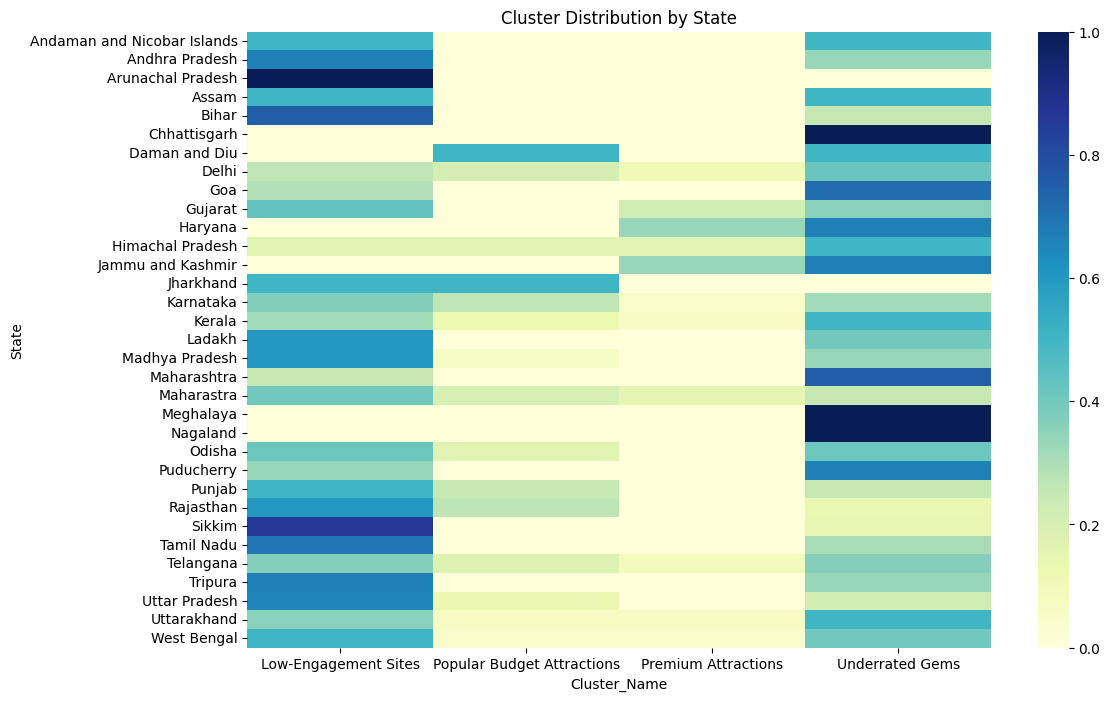

In [73]:
# If coordinates aren't available, we can do state-level analysis
state_cluster_dist = pd.crosstab(data['State'], data['Cluster_Name'], normalize='index')
plt.figure(figsize=(12, 8))
sns.heatmap(state_cluster_dist, cmap='YlGnBu')
plt.title('Cluster Distribution by State')
plt.show()

In [74]:
# Generate recommendations based on cluster analysis
recommendations = {
    'Premium Attractions': [
        "Partner with luxury tour operators for premium packages",
        "Offer VIP experiences or after-hours access",
        "Highlight in high-end travel magazines"
    ],
    'Popular Budget Attractions': [
        "Feature in budget travel guides and backpacker routes",
        "Promote through social media influencers",
        "Offer combo tickets for nearby attractions"
    ],
    'Underrated Gems': [
        "Improve amenities and visitor facilities",
        "Create targeted marketing campaigns",
        "Develop thematic tours around these attractions"
    ],
    'Low-Engagement Sites': [
        "Conduct visitor surveys to identify improvement areas",
        "Consider reducing entry fees or offering free days",
        "Evaluate if worth maintaining in app recommendations"
    ]
}

print("=== Marketing Recommendations by Cluster ===")
for cluster, recs in recommendations.items():
    print(f"\n**{cluster}**")
    for i, rec in enumerate(recs, 1):
        print(f"{i}. {rec}")

=== Marketing Recommendations by Cluster ===

**Premium Attractions**
1. Partner with luxury tour operators for premium packages
2. Offer VIP experiences or after-hours access
3. Highlight in high-end travel magazines

**Popular Budget Attractions**
1. Feature in budget travel guides and backpacker routes
2. Promote through social media influencers
3. Offer combo tickets for nearby attractions

**Underrated Gems**
1. Improve amenities and visitor facilities
2. Create targeted marketing campaigns
3. Develop thematic tours around these attractions

**Low-Engagement Sites**
1. Conduct visitor surveys to identify improvement areas
2. Consider reducing entry fees or offering free days
3. Evaluate if worth maintaining in app recommendations


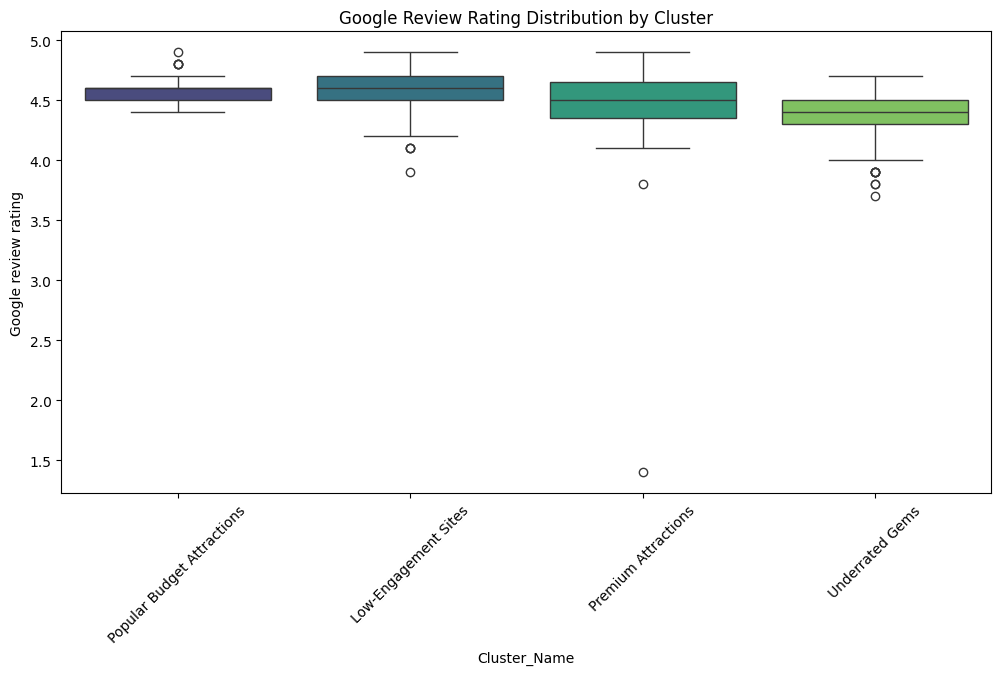

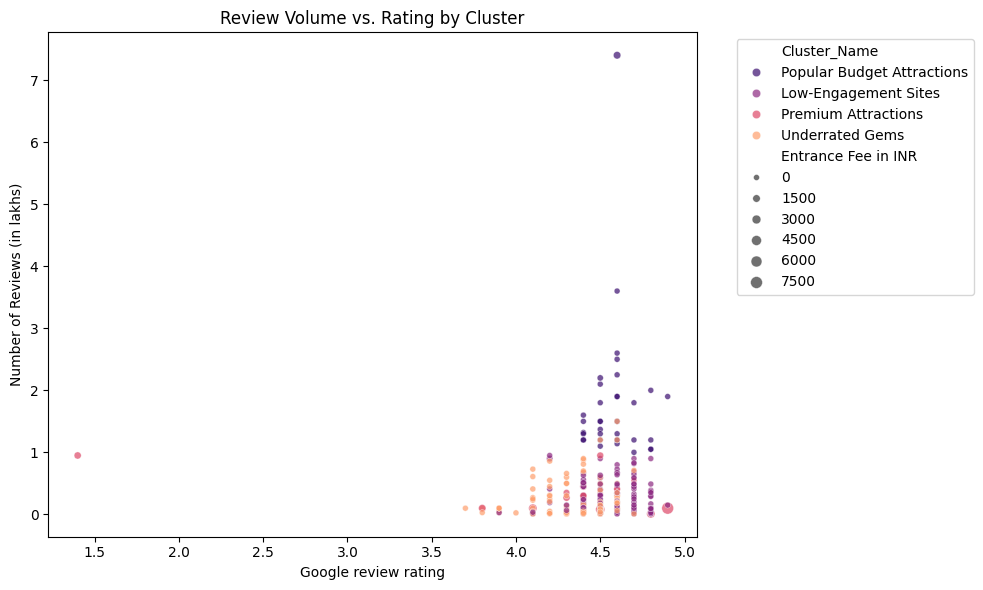

Review Metrics by Cluster:


Google review rating               \
                                           mean median count   
Cluster_Name                                                   
Low-Engagement Sites                       4.58    4.6   145   
Popular Budget Attractions                 4.58    4.6    35   
Premium Attractions                        4.32    4.5    19   
Underrated Gems                            4.38    4.4   126   

                           Number of google review in lakhs        
                                                        sum  mean  
Cluster_Name                                                       
Low-Engagement Sites                                  37.65  0.26  
Popular Budget Attractions                            61.88  1.77  
Premium Attractions                                    5.52  0.29  
Underrated Gems                                       27.70  0.22

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data,
           x='Cluster_Name',
           y='Google review rating',
           palette='viridis')
plt.title('Google Review Rating Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()
# Review Volume vs Rating Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data,
               x='Google review rating',
               y='Number of google review in lakhs',
               hue='Cluster_Name',
               size='Entrance Fee in INR',
               palette='magma',
               alpha=0.7)
plt.title('Review Volume vs. Rating by Cluster')
plt.ylabel('Number of Reviews (in lakhs)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
#Review-Based Cluster Characteristics
review_analysis = data.groupby('Cluster_Name').agg({
    'Google review rating': ['mean', 'median', 'count'],
    'Number of google review in lakhs': ['sum', 'mean']
}).round(2)

print("Review Metrics by Cluster:")
display(review_analysis)

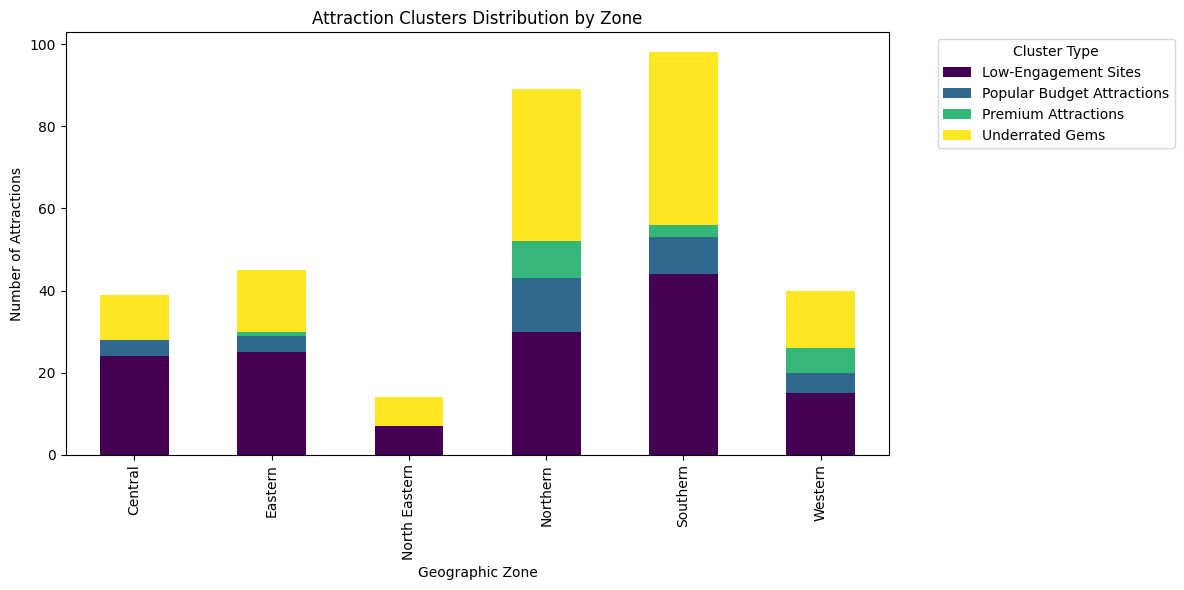

In [76]:
# Cluster distribution by geographic zone
zone_cluster = data.groupby(['Zone', 'Cluster_Name']).size().unstack()
zone_cluster.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Attraction Clusters Distribution by Zone')
plt.ylabel('Number of Attractions')
plt.xlabel('Geographic Zone')
plt.legend(title='Cluster Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

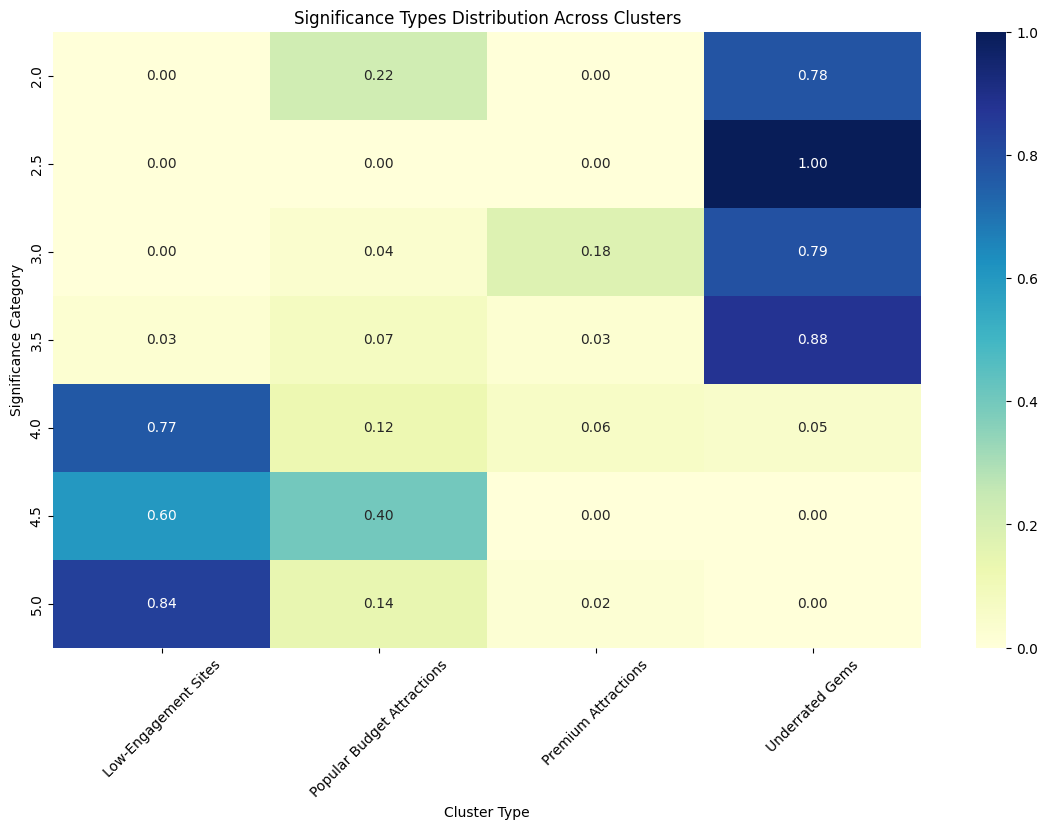

In [78]:
# Significance types by cluster
sig_cluster = pd.crosstab(data['Significance'], data['Cluster_Name'], normalize='index')
plt.figure(figsize=(14,8))
sns.heatmap(sig_cluster, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Significance Types Distribution Across Clusters')
plt.xlabel('Cluster Type')
plt.ylabel('Significance Category')
plt.xticks(rotation=45)
plt.show()